In [8]:
import pandas as pd
import matplotlib.pyplot as plt

   num_atoms  avg_partition_size  partition_energy  benchmark_energy  \
0        426               426.0      -2207.775146      -2207.775146   
1       1704              1703.9      -8831.085938      -8831.085938   

   energy_error_abs  energy_error_pct  avg_partition_time  benchmark_time  
0               0.0               0.0            0.200474        0.308284  
1               0.0               0.0            1.488639        1.510102  


In [12]:
df = pd.read_csv("mattersim_test_results.csv")

avg_df = df.groupby("num_atoms", as_index=False).mean()

print(avg_df)

   num_atoms  avg_partition_size  partition_energy  benchmark_energy  \
0        426               426.0      -2207.775146      -2207.775146   
1       1704              1703.9      -8831.085938      -8831.085938   

   energy_error_abs  energy_error_pct  avg_partition_time  benchmark_time  
0               0.0               0.0            0.200474        0.308284  
1               0.0               0.0            1.488639        1.510102  


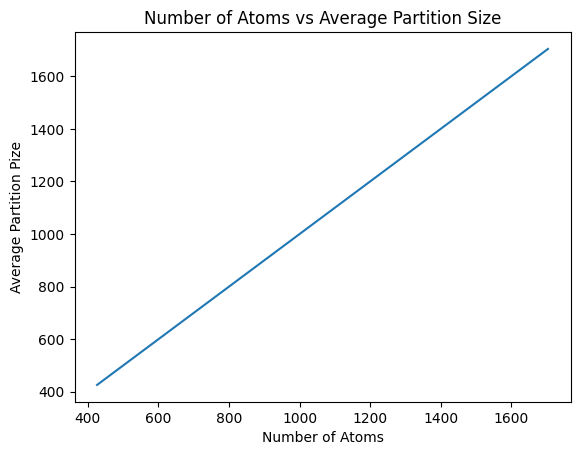

In [14]:
plt.plot(avg_df["num_atoms"], avg_df["avg_partition_size"])
plt.xlabel("Number of Atoms")
plt.ylabel("Average Partition Pize")
plt.title("Number of Atoms vs Average Partition Size")
plt.show()

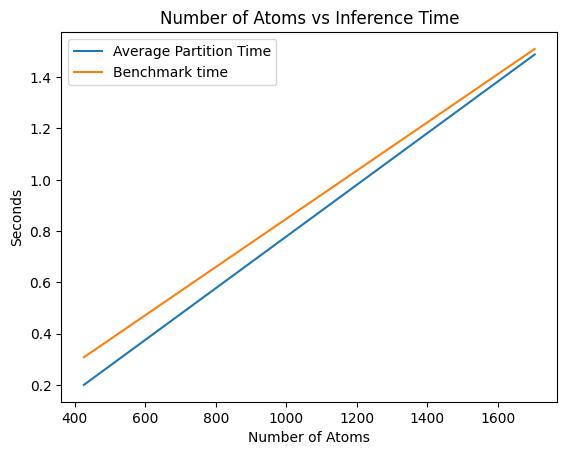

In [22]:
plt.plot(avg_df["num_atoms"], avg_df["avg_partition_time"], label="Average Partition Time")
plt.plot(avg_df["num_atoms"], avg_df["benchmark_time"], label="Benchmark time")
plt.xlabel("Number of Atoms")
plt.ylabel("Seconds")
plt.title("Number of Atoms vs Inference Time")
plt.legend()
plt.show()

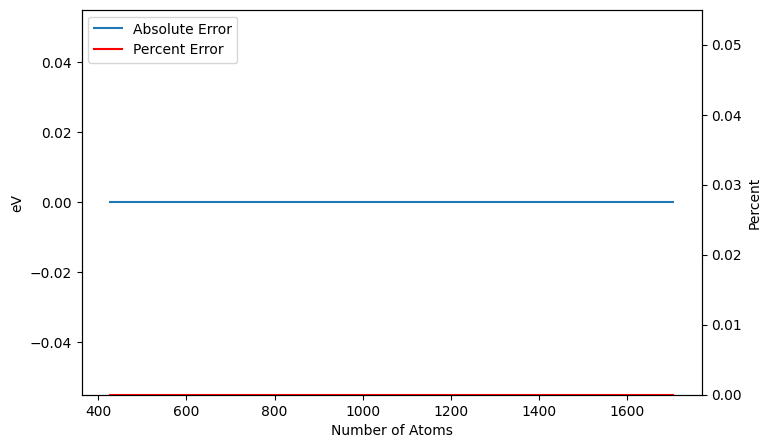

In [37]:
fig, ax1 = plt.subplots(figsize=(8,5))

line1, = ax1.plot(avg_df["num_atoms"], avg_df["energy_error_abs"], label="Absolute Error")
ax1.set_ylabel("eV")
ax1.set_xlabel("Number of Atoms")

ax2 = ax1.twinx()
line2, = ax2.plot(avg_df["num_atoms"], avg_df["energy_error_pct"], label="Percent Error", color='red')
ax2.set_ylabel("Percent")
ax2.set_ylim(0)

lines = [line1, line2]  # Collect line objects
labels = [line.get_label() for line in lines]  # Get labels

# Place the legend
ax1.legend(lines, labels, loc="upper left")  # Adjust location as needed
plt.show()